In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl 


In [4]:
df = pd.read_csv('FuelConsumption.csv')
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


In [7]:
from sklearn.preprocessing import StandardScaler
StandardScaler(cdf)

TypeError: StandardScaler.__init__() takes 1 positional argument but 2 were given

In [ ]:
msk = np.random.randn(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
# train

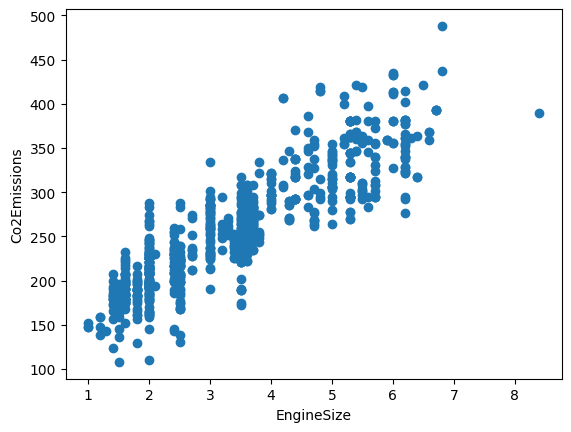

In [ ]:
x1 = train['ENGINESIZE'].tolist()
y1 = train['CO2EMISSIONS'].tolist()
plt.scatter(x1, y1)
plt.xlabel('EngineSize')
plt.ylabel('Co2Emissions')
plt.show()

In [ ]:
len(train['ENGINESIZE'])
len(train['CO2EMISSIONS'])

828

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

reg.fit(x, y)

print(f'coefficients : {reg.coef_}')
print(f'intercept : {reg.intercept_}')

coefficients : [[11.3807452   7.70891359  9.16235798]]
intercept : [67.20765879]


In [ ]:
model = 0
a = reg.intercept_[0]
b= reg.coef_[0][0] * train['ENGINESIZE'].tolist()
c = reg.coef_[0][1] * train['CYLINDERS'].tolist()
d = reg.coef_[0][2] * train['FUELCONSUMPTION_COMB'].tolist()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [ ]:
x1 = train['ENGINESIZE'].tolist()
y1 = train['CO2EMISSIONS'].tolist()

model =reg.intercept_[0] + (reg.coef_[0][0] * train['ENGINESIZE'].tolist()) + (reg.coef_[0][1] * train['CYLINDERS'].tolist()) + (reg.coef_[0][2] * train['FUELCONSUMPTION_COMB'].tolist())

plt.scatter(x1, y1)
plt.plot(x, model, color='red')
plt.xlabel('EngineSize')
plt.ylabel('Co2Emissions')
plt.show()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'